# Run
python obiwan/priors.py --outdir /home/kaylan/mydata/priors_data

# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from astropy.io import fits
from astrometry.util.fits import fits_table, merge_tables
import os
import sys
from glob import glob
from scipy.optimize import newton
from sklearn.neighbors import KernelDensity
import pickle
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from six.moves import urllib                                                                
import tarfile                                                                              
import pandas as pd                                                                         
from pandas.plotting import scatter_matrix

from theValidator.catalogues import CatalogueFuncs,Matcher

In [3]:
# Import like this so will ALWAYS be reloaded
%aimport obiwan.priors
print(obiwan.priors.__file__)

/home/kaylan/myrepo/obiwan/py/obiwan/priors.py


# Get the Data

In [4]:
DOWNLOAD_ROOT = "http://portal.nersc.gov/project/desi/users/kburleigh/obiwan/"              
OBJTYPES= ['elg','lrg','star','qso']                                                        
                                                                                            
plt.rcParams['axes.labelsize'] = 14                                                         
plt.rcParams['xtick.labelsize'] = 12                                                        
plt.rcParams['ytick.labelsize'] = 12

OUTDIR="/home/kaylan/mydata/priors_data"

In [5]:
elg= obiwan.priors.EmptyClass()                                                                       
                                                                                            
d= obiwan.priors.Data()                                                                                                                               
d.fetch(OUTDIR)                                                                         
elg.data= d.load_elg(DR=3)                                                                                                                                              

/home/kaylan/myrepo/obiwan/py/obiwan/priors.py:309: RuntimeWarning: invalid value encountered in less
  cut*= np.all((data.get('decam_fracflux')[:, [1,2,4]] < 0.05),axis=1)


# Kernel Density Estimate for Population

In [6]:
elg.model= obiwan.priors.KDE_Model('elg',elg.data,OUTDIR)                                             
elg.model.kde= elg.model.get_kde()      

('Loaded pickle', '/home/kaylan/mydata/priors_data/kdes/elg-kde_py2.pkl')


# Plots (Pandas DF built in)

## ELG

('Saving figure', '/home/kaylan/mydata/priors_data/elg_hist_df_wcut.png')


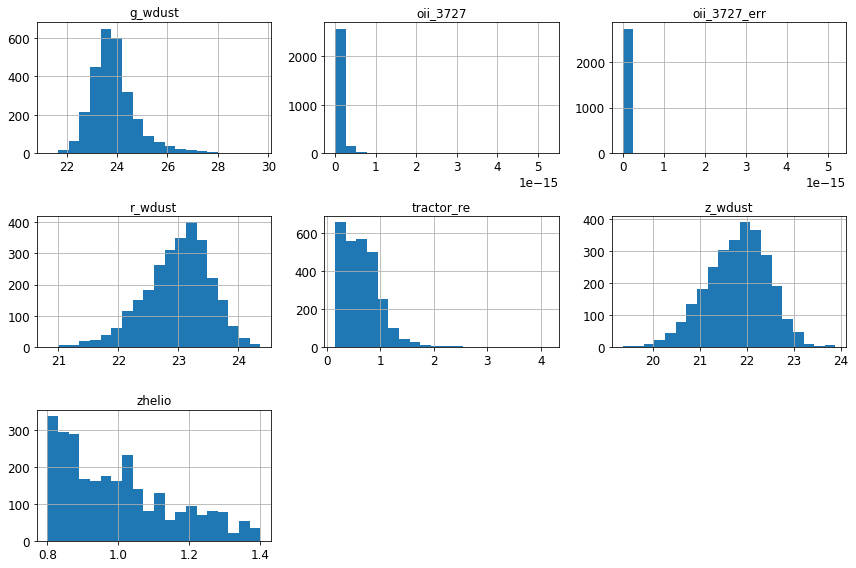

In [10]:
src='elg'
elg.model.df_wcut.hist(bins=20,figsize=(12,8))                                                
obiwan.priors.save_png(OUTDIR,'%s_hist_df_wcut' % src)

('Saving figure', '/home/kaylan/mydata/priors_data/elg_scat_df_wcut.png')


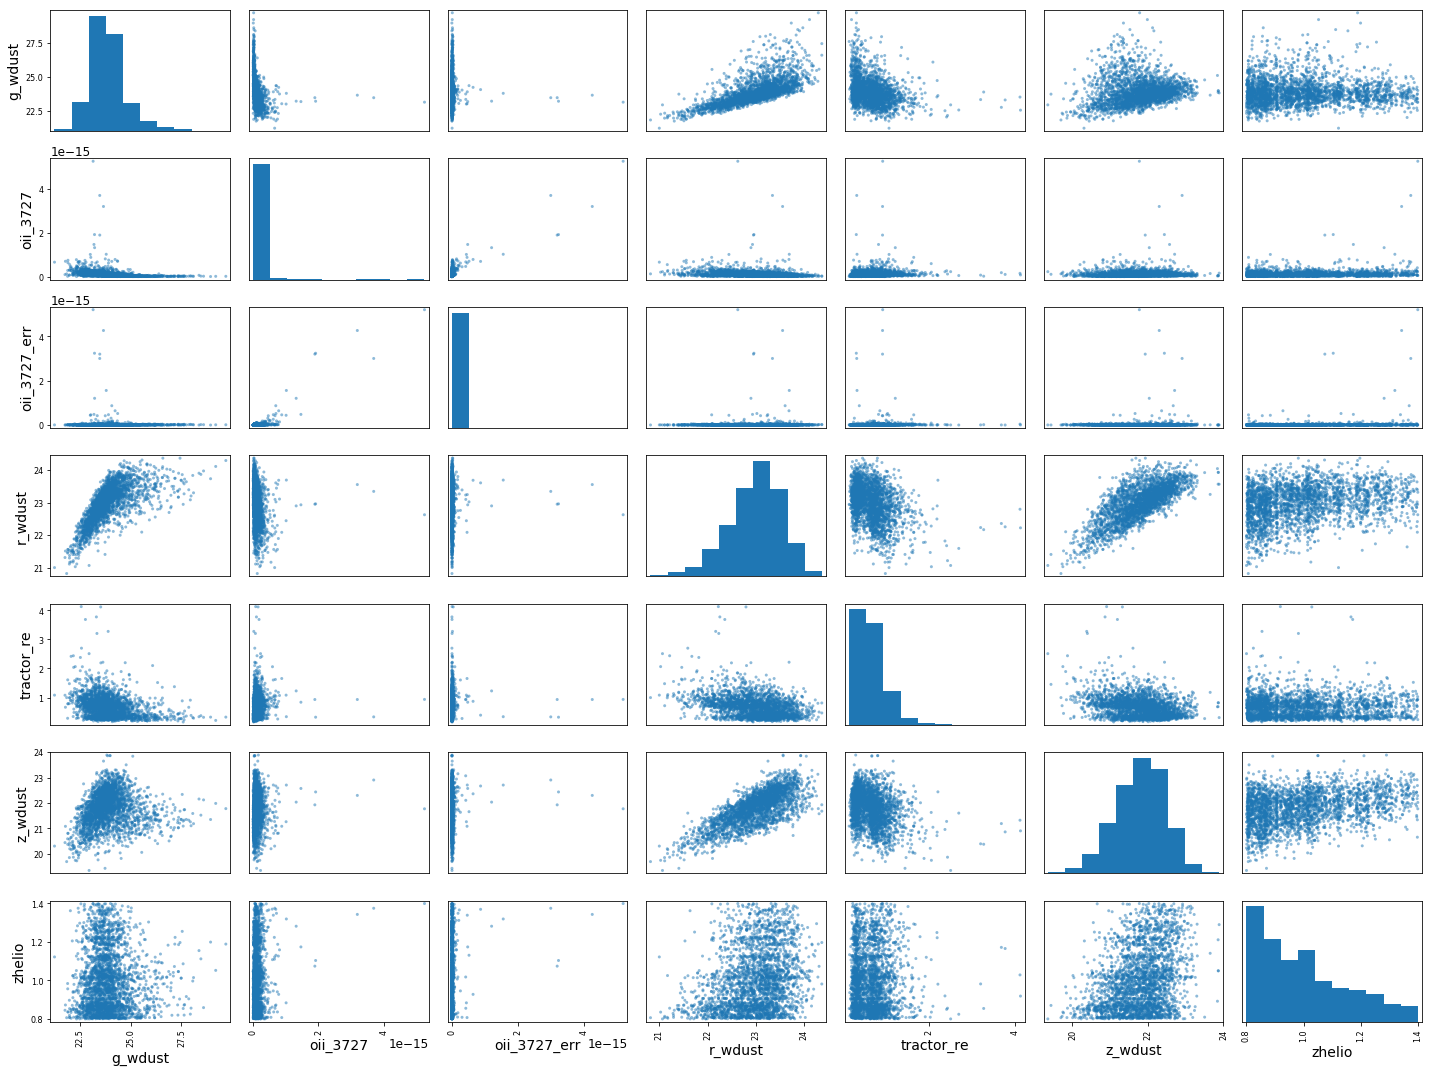

In [13]:
scatter_matrix(elg.model.df_wcut, figsize=(20, 15))                                           
obiwan.priors.save_png(OUTDIR,'%s_scat_df_wcut' % src) 

('Saving figure', '/home/kaylan/mydata/priors_data/elg_hist_df_for_kde.png')


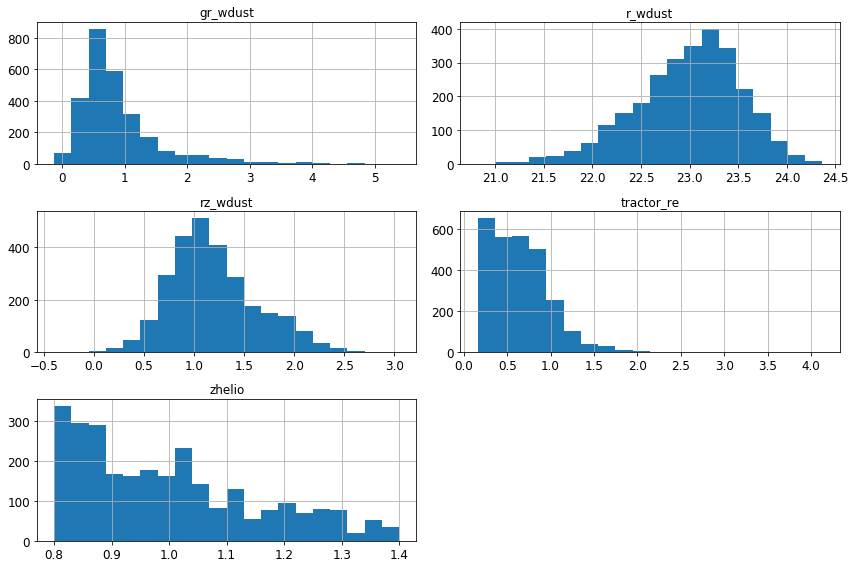

In [17]:
elg.model.df_for_kde.hist(bins=20,figsize=(12,8))                                             
obiwan.priors.save_png(OUTDIR,'%s_hist_df_for_kde' % src) 

('Saving figure', '/home/kaylan/mydata/priors_data/elg_scat_df_for_kde.png')


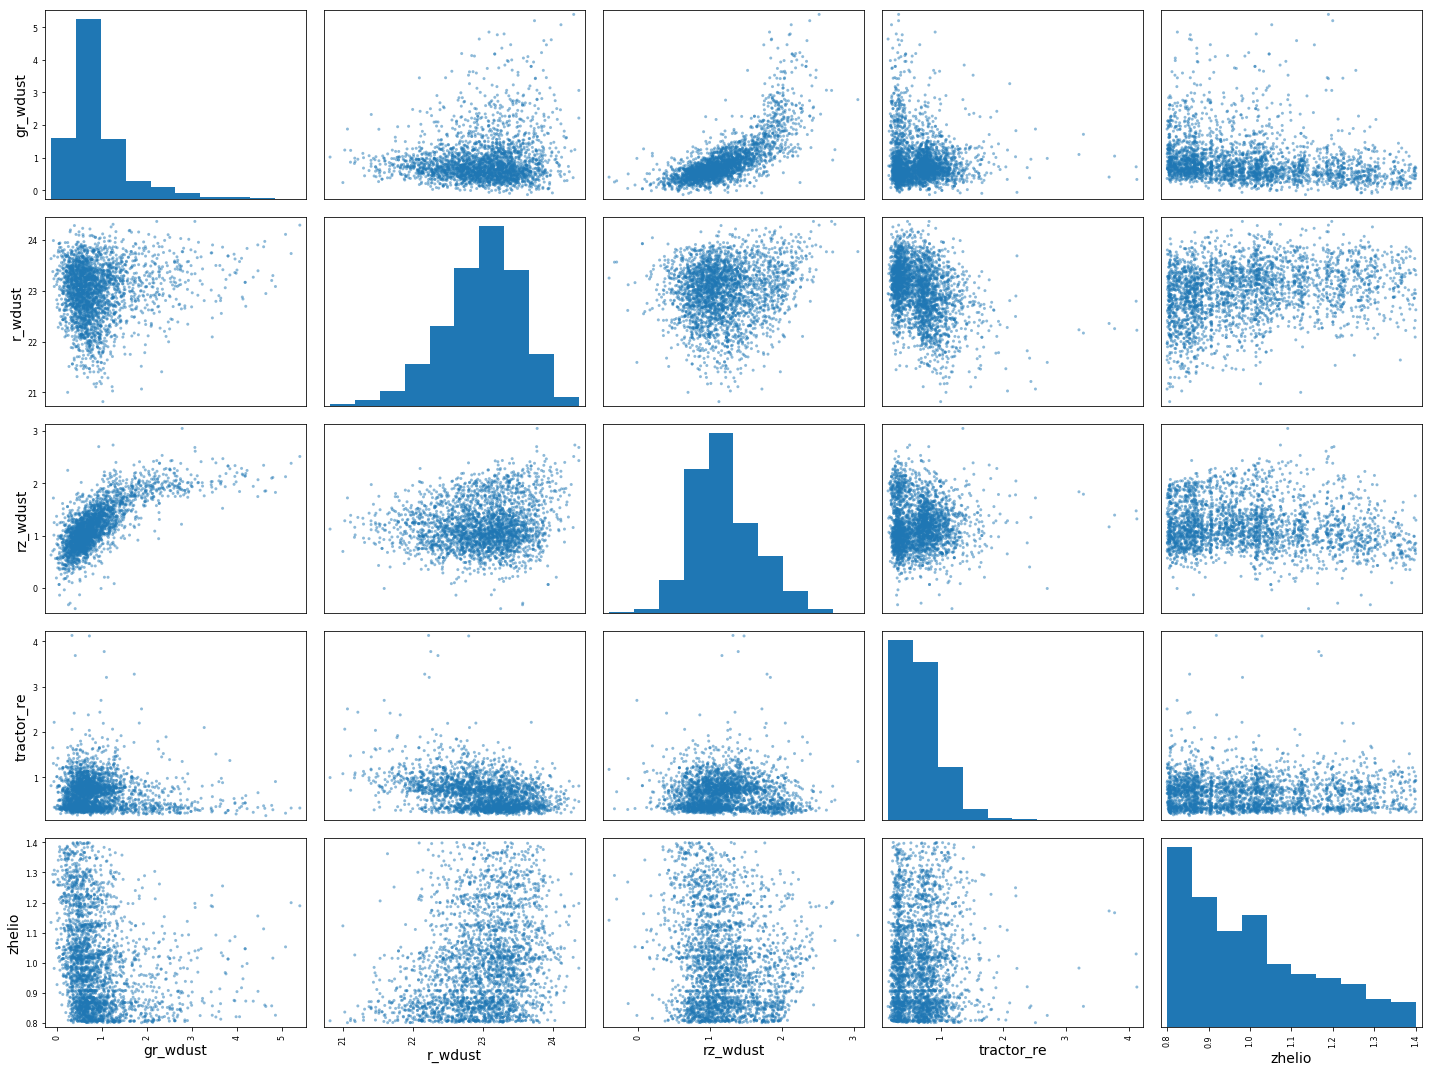

In [18]:
scatter_matrix(elg.model.df_for_kde, figsize=(20, 15))                                        
obiwan.priors.save_png(OUTDIR,'%s_scat_df_for_kde' % src)

('Saving figure', '/home/kaylan/mydata/priors_data/elg_hist_df_samp.png')


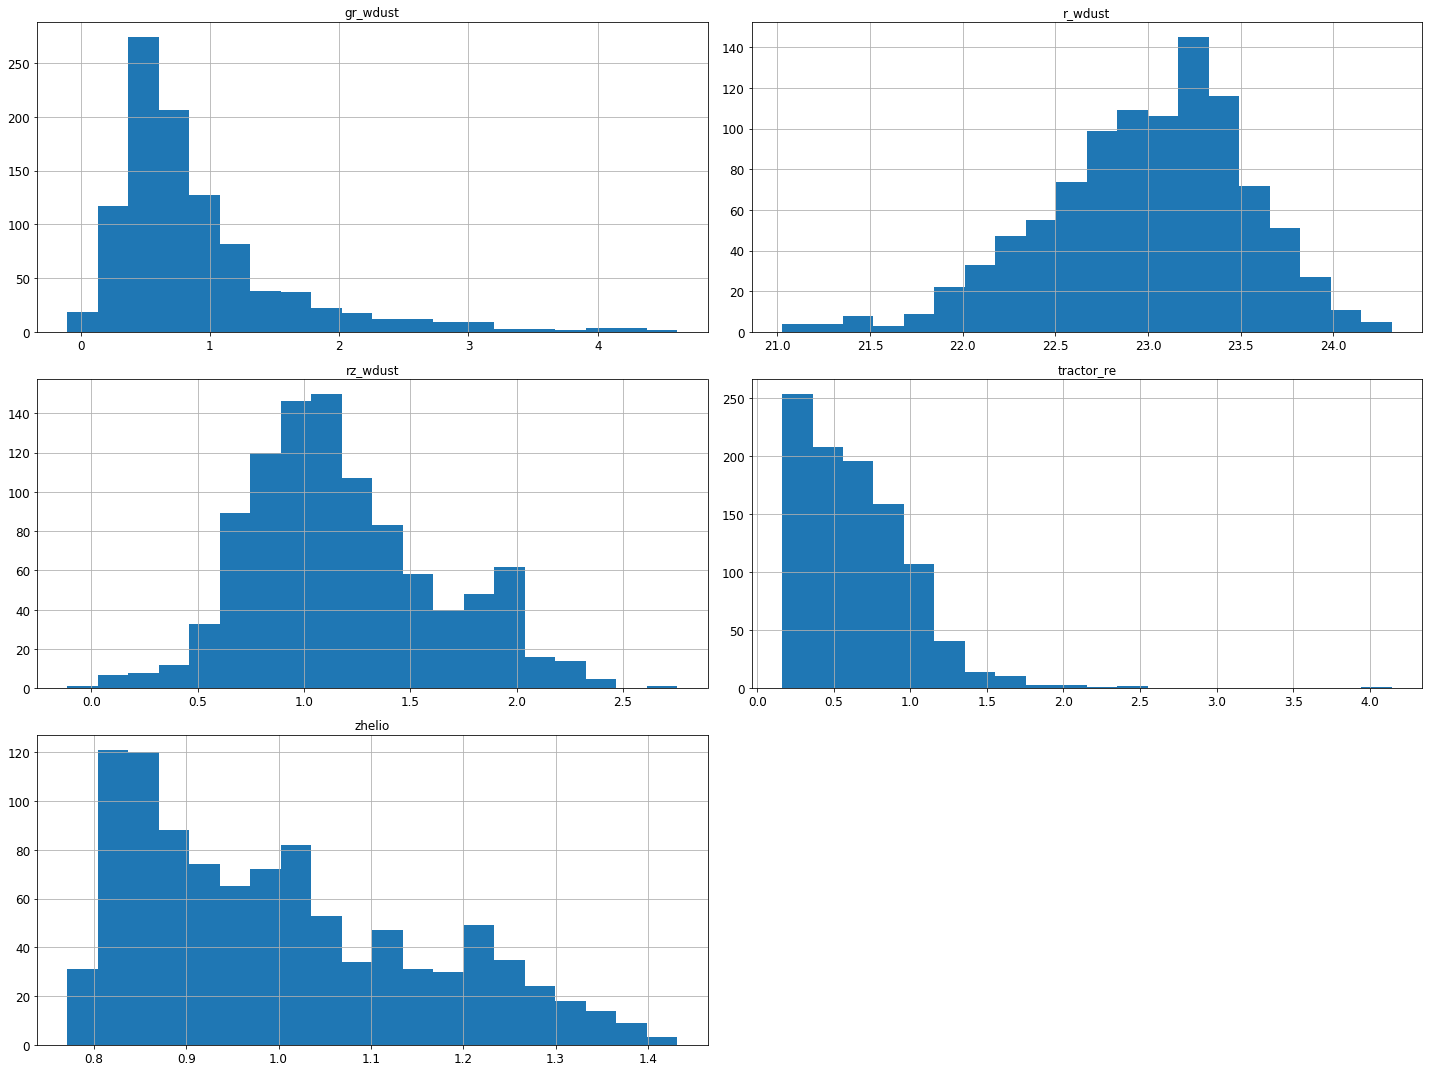

In [22]:
samp= elg.model.kde.sample(n_samples=1000)                                                    
df_samp= pd.DataFrame(samp,columns=(elg.model.df_for_kde.keys()))                             
df_samp.hist(bins=20,figsize=(20,15)) 
obiwan.priors.save_png(OUTDIR,'%s_hist_df_samp' % src) 

('Saving figure', '/home/kaylan/mydata/priors_data/elg_scat_df_samp.png')


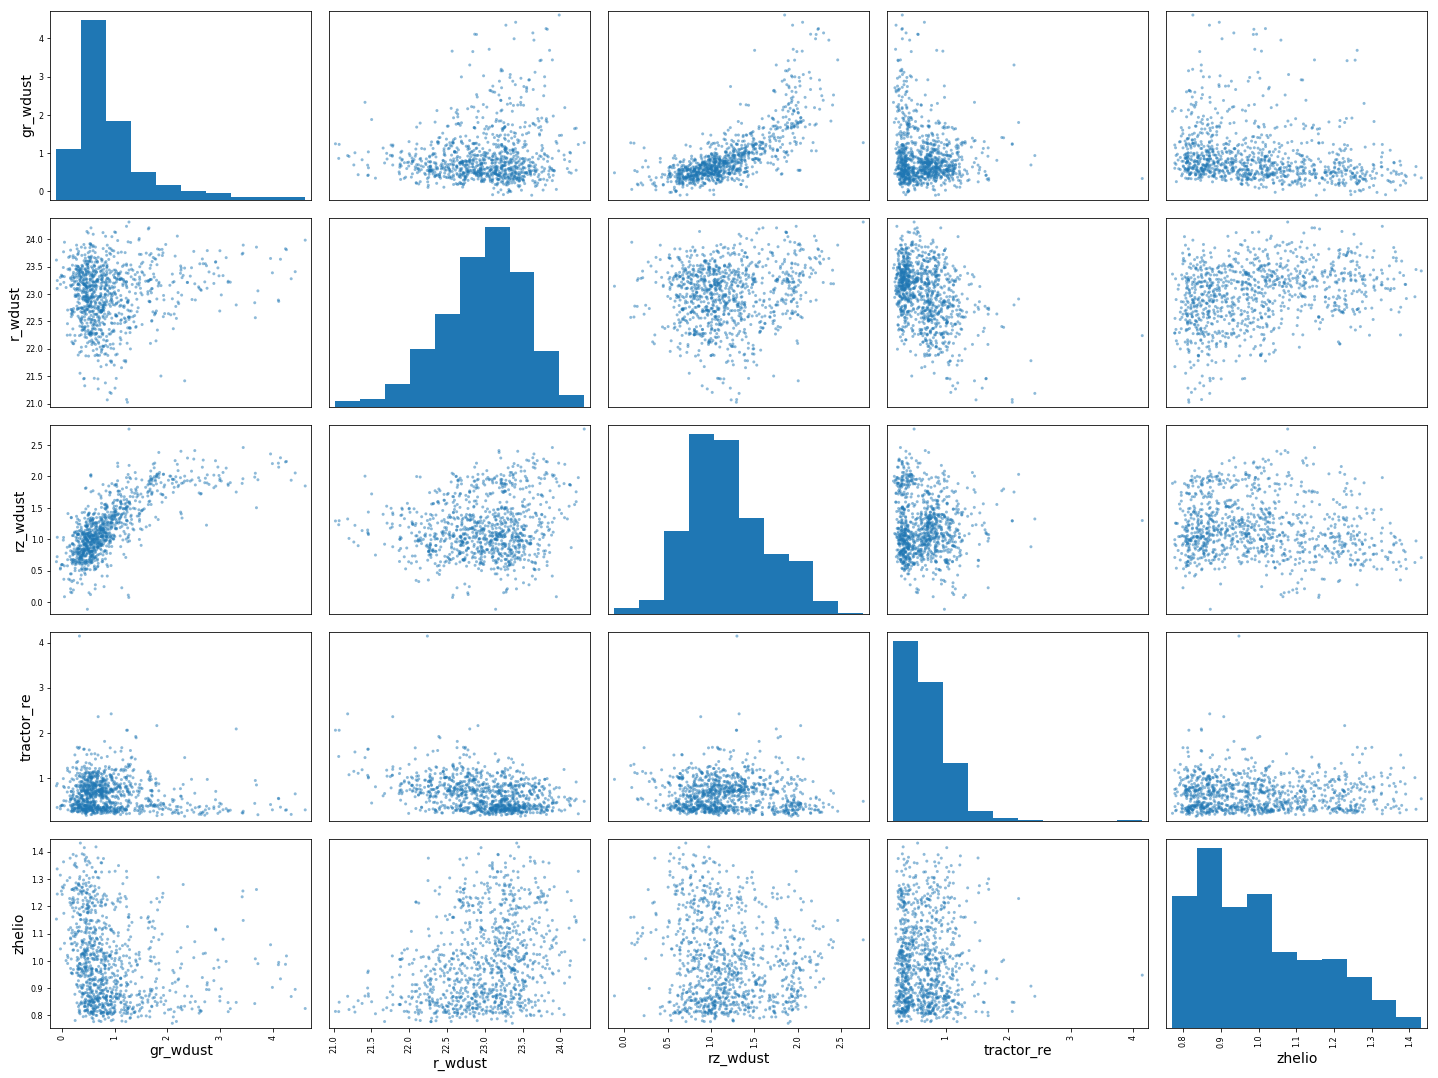

In [23]:
scatter_matrix(df_samp, figsize=(20, 15))                                           
obiwan.priors.save_png(OUTDIR,'%s_scat_df_samp' % src)   